In [1]:
import zipfile
import scipy.io
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import mne
import torch
from torchvision import datasets, transforms

In [2]:
# zip_files = ['/home/mcesped/scratch/Datasets/2048Hz/Dataset_Mayo_DWT.zip', '/home/mcesped/scratch/Datasets/2048Hz/Dataset_Fnusa_DWT.zip']
zip_files = ['/home/mcesped/scratch/Datasets/1200Hz/Dataset_Mayo_DWT.zip', '/home/mcesped/scratch/Datasets/1200Hz/Dataset_Fnusa_DWT.zip'] #'/home/mcesped/scratch/Datasets/1200Hz/Dataset_Mayo_1200_DWT.zip'

for zip_id, zip_file in enumerate(zip_files):
    with zipfile.ZipFile(zip_file, mode="r") as f:
        # Filename 
        filename = os.path.basename(zip_file)
        print(filename)
        # Get all files
        files = f.namelist()
        print(len(files))
        print(files[0])
        # Open 1 files to check
        with f.open(files[0]) as myfile:
            # data = pd.read_csv(myfile, sep=",", index_col="Unnamed: 0")
            # print(data.head())
            try:
                data = torch.load(myfile)
                print(data.shape)
            except:
                data= np.load(myfile)
                print(data.shape)

Dataset_Mayo_DWT.zip
39495
x001051.npy
(120,)
Dataset_Fnusa_DWT.zip
36250
y052576.npy
(120,)


## Test decoding

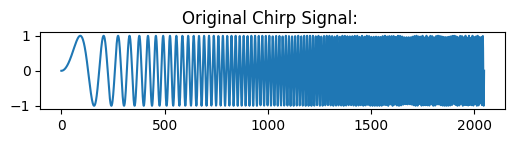

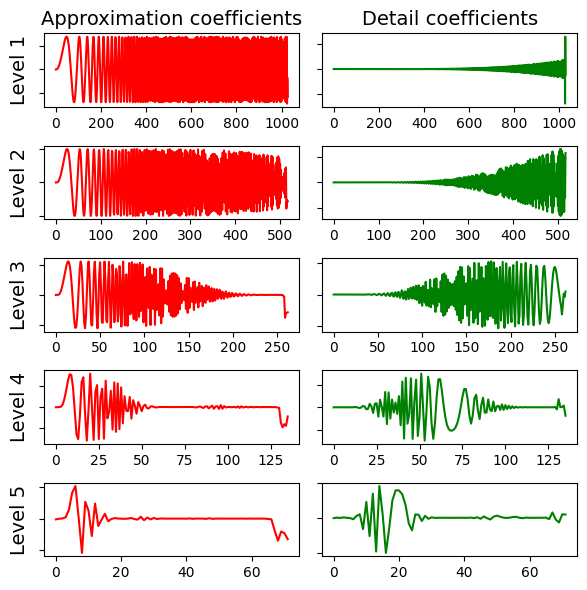

In [3]:
import pywt

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

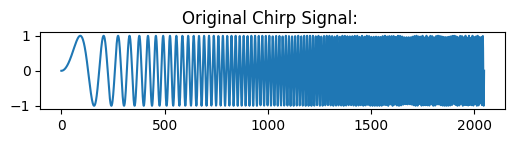

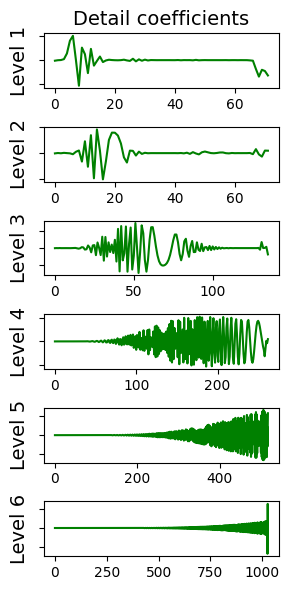

In [12]:
import pywt

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

list_coeff = pywt.wavedec(data, waveletname, level=5)

fig, axarr = plt.subplots(nrows=len(list_coeff), ncols=1, figsize=(3,6))
for ii in range(len(list_coeff)):
    axarr[ii].plot(list_coeff[ii], 'g')
    axarr[ii].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    if ii == 0:
        # axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii].set_title("Detail coefficients", fontsize=14)
    axarr[ii].set_yticklabels([])
plt.tight_layout()
plt.show()

In [16]:
for coeff in list_coeff:
    print(coeff.shape)

(72,)
(72,)
(136,)
(263,)
(518,)
(1028,)


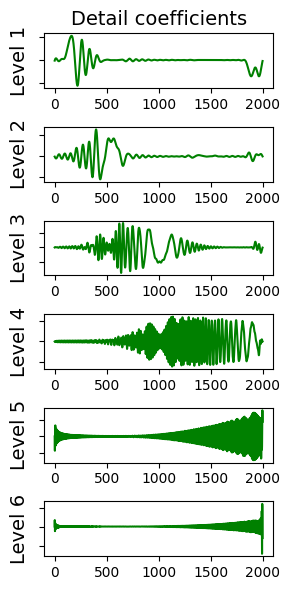

In [24]:
import scipy.signal
import samplerate

coeffs_resampled = []
resample_n = 2048
for coeff in list_coeff:
    if len(coeff) != resample_n:
        # coeffs_resampled.append(scipy.signal.resample(coeff, resample_n))
        ratio = resample_n/len(coeff)
        converter = 'sinc_best'
        coeffs_resampled.append(samplerate.resample(coeff, ratio, converter))
    else:
        coeffs_resampled.append(coeff)
# Plot
fig, axarr = plt.subplots(nrows=len(list_coeff), ncols=1, figsize=(3,6))
for ii in range(len(list_coeff)):
    axarr[ii].plot(coeffs_resampled[ii], 'g')
    axarr[ii].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    if ii == 0:
        # axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii].set_title("Detail coefficients", fontsize=14)
    axarr[ii].set_yticklabels([])
plt.tight_layout()
plt.show()

## Test dataset

In [2]:
import sys
sys.path.insert(0,'/scratch/mcesped/code/NoiseDetection_iEEG/interictal_classifier/')

import custom_dataset

In [3]:
zip_files = ['/home/mcesped/scratch/Datasets/Dataset_Fnusa_np.zip', '/home/mcesped/scratch/Datasets/Dataset_Mayo_np.zip']
df_train, df_val = custom_dataset.get_train_val_sets(zip_files)
df_train.head()

,index,anatomy,category_id,channel,electrode_type,institution,patient_id,reviewer_id,segment_id,soz,category_name
0,0,gyrus lingualis,0,D1,depth,fnusa,0,1,y000000,0,powerline
1,1,gyrus lingualis,0,D1,depth,fnusa,0,1,y000001,0,powerline
2,2,gyrus lingualis,0,D1,depth,fnusa,0,1,y000002,0,powerline
3,3,gyrus lingualis,0,D1,depth,fnusa,0,1,y000003,0,powerline
4,4,gyrus lingualis,0,D1,depth,fnusa,0,1,y000004,0,powerline


In [4]:
# Reload dataset with transform
train_data_transformed = custom_dataset.Dataset_DWT(df=df_train, zip_files=zip_files)

In [5]:
data, target = train_data_transformed[10]
print(data.shape, target)

10
(120,) 0


In [13]:
def print_caca(a,b,c=0):
    print(a)
    print(b,c)

In [15]:
print_caca(*[1,2,4])

1
2 4


In [ ]:
a = [2,3,4.3]
a.appe

## Train the model Noise detection

In [2]:
import torch
from xgboost import XGBClassifier
import sys
import sys
sys.path.insert(0,'/scratch/mcesped/code/NoiseDetection_iEEG/interictal_classifier/')
import data_setup
import model
from engine_tree import train
import utils
import torch.nn as nn
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
import json
import os

/local/mcesped.16939417.0/tmp/kslurm-venv-zyrh7_0k/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

### Get datasets

In [5]:
# Zip files and transforms
srate=1024
zip_files = [
    f"/home/mcesped/scratch/Datasets/Dataset_Fnusa_{srate}.zip",
    f"/home/mcesped/scratch/Datasets/Dataset_Mayo_{srate}.zip",
]
df_train_path = '/scratch/mcesped/Datasets/Noise_detection/df_train_curated.csv'
df_val_path = '/scratch/mcesped/Datasets/Noise_detection/df_val_curated.csv'

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [6]:
(
        train_dataloader,
        val_dataloader,
        _,
    ) = data_setup.create_dataloaders_tree(
        zip_files,
        df_train_path,
        df_val_path,
        batch_size=-1,
        num_workers=32,
        binary=True,
        previosly_uncompressed = False,
    )
train_dataloader, val_dataloader 

Percentage df train: 0.5102144921903466

Grouping Pathology and physiology in one class


Uncompressing data..

Creating dataset classes...
Full


(<torch.utils.data.dataloader.DataLoader at 0x2b1f5fe5afb0>,
 <torch.utils.data.dataloader.DataLoader at 0x2b1f5fe5b1f0>)

In [7]:
X_train, y_train = next(iter(train_dataloader))
X_test, y_test = next(iter(val_dataloader))

In [8]:
X_train, y_train = X_train.detach().numpy(), y_train.detach().numpy()
X_test, y_test = X_test.detach().numpy(), y_test.detach().numpy()

In [9]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42008, 126), (42008,), (40326, 126), (40326,))

In [11]:
y_train

array([1, 0, 0, ..., 1, 0, 1])

In [13]:
126/14

9.0

### Run CV

In [27]:
# Create model
model = XGBClassifier(
    max_depth=2,  # Depth of each tree
    learning_rate=0.001,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
    n_estimators=6000,  # How many trees to use, the more the better, but decrease learning rate if many used.
    verbosity=1,  # If to show more errors or not.
    objective="binary:logistic",  # Type of target variable.
    booster="gbtree",  # What to boost. Trees in this case.
    n_jobs=32,  # Parallel jobs to run. Set your processor number.
    random_state=20201107,  # Seed
    gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
    colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
    colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
    colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
)

In [22]:
# Crossvalidation object
cv_object = StratifiedKFold(n_splits=3)
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [1000, 3000, 5000],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.001, 0.01]
                  })

In [28]:
# Define grid search object.
GridXGB = GridSearchCV(model,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = cv_object,      # Cross-validation object.  
                       scoring = 'f1_weighted', # How to rank outputs.
                       n_jobs = 32,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [29]:
GridXGB.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


KeyboardInterrupt: 

In [ ]:
GridXGB.best_params_
#GridXGB.cv_results_

### Fit best model

In [35]:
# Create model
model = XGBClassifier(
    max_depth=8,  # Depth of each tree
    learning_rate=0.01,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
    n_estimators=2500,  # How many trees to use, the more the better, but decrease learning rate if many used.
    verbosity=1,  # If to show more errors or not.
    objective="binary:logistic",#"multi:softprop",  # Type of target variable.
    booster="gbtree",  # What to boost. Trees in this case.
    n_jobs=32,  # Parallel jobs to run. Set your processor number.
    random_state=20201107,  # Seed
    gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
    colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
    colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
    colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
    eval_metric=['logloss']
)

In [13]:
X_train[0:150,:].shape, y_train[0:100].shape

((150, 126), (100,))

In [36]:
model.fit(X_train, y_train, verbose=False, eval_set=eval_set, early_stopping_rounds=50)

/local/mcesped.16939417.0/tmp/kslurm-venv-zyrh7_0k/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['logloss'], feature_types=None, gamma=0.001,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2500, n_jobs=32, num_parallel_tree=None,
              predictor=None, random_state=20201107, ...)

In [21]:
results = model.evals_result()
results['validation_0'].keys()

odict_keys(['logloss'])

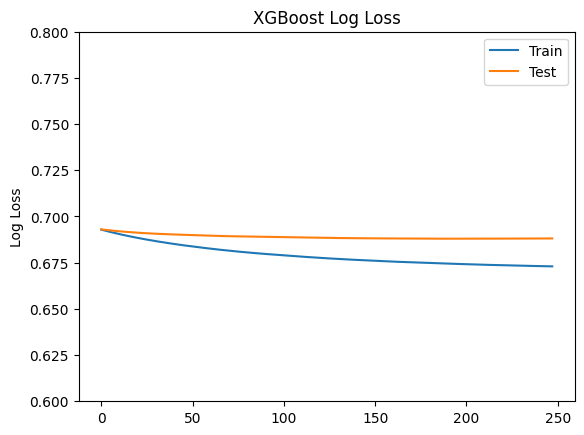

0.6879699552317244


In [37]:
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
ax.set_ylim([0.6,0.8])
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
print(np.min(results['validation_1']['logloss']))

In [38]:
print("\nTrain Metrics:")
y_pred = model.predict(X_train)
t_metrics = utils.classication_metrics_binary(y_train, y_pred)
utils.print_key_metrics_binary(*t_metrics)


Train Metrics:

-------------------- Key Metrics --------------------

Accuracy: 0.84
Balanced Accuracy: 0.84

Precision: 0.83
Recall: 0.83
F1-score: 0.83



In [39]:
print("\nTest Metrics:")
y_pred = model.predict(X_test)
t_metrics = utils.classication_metrics_binary(y_test, y_pred)
utils.print_key_metrics_binary(*t_metrics)


Test Metrics:

-------------------- Key Metrics --------------------

Accuracy: 0.78
Balanced Accuracy: 0.78

Precision: 0.79
Recall: 0.77
F1-score: 0.78



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Define the classifier
model_rf = RandomForestClassifier(n_estimators=1000, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports entropy.
                       class_weight='balanced',
                        max_depth=14,
                        n_jobs=32)

In [42]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [1000, 2000, 3000],
                   'max_depth': [4,6,8,10,12],
                 'max_features' : [0.2, 0.3, 0.5],
                   'min_samples_leaf': [0.2, 0.05]
                  })

In [ ]:
# Manual grid search
params = []
scores = []
for n_est in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for max_features in param_grid['max_features']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                model_rf = RandomForestClassifier(n_estimators=n_est, # Number of trees to train
                           criterion='entropy', # How to train the trees. Also supports entropy.
                           class_weight='balanced',
                            max_depth=max_depth,                     
                            max_features = max_features,
                            min_samples_leaf = min_samples_leaf,
                            n_jobs=32)
                # Train model
                model_rf.fit(X_train, y_train)
                # Get score based on val set
                y_pred = model_rf.predict(X_test)
                t_metrics = utils.classication_metrics(y_test, y_pred, test=False)
                # Save results
                params.append((n_est, max_depth, max_features, min_samples_leaf))
                scores.append(t_metrics[-1])

In [ ]:
# Get best score
id_best = np.argmax(scores)

best_params = params[id_best]
best_params = {'n_estimators': best_params[0],
    'max_depth': best_params[1],
    'max_features' : best_params[2],
    'min_samples_leaf': best_params[3]
}
print('Best score params\n')
print(best_params)
# Best params short data: {'n_estimators': 2000, 'max_depth': 14, 'max_features': 0.2, 'min_samples_leaf': 0.05}
# Long data: 

In [77]:
best_params = {'n_estimators': 2000, 'max_depth': 14, 'max_features': 0.5, 'min_samples_leaf': 0.05}

In [78]:
model_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports entropy.
                       class_weight='balanced',
                        max_depth=best_params['max_depth'],
                        min_samples_leaf = best_params['min_samples_leaf'],
                        max_features = best_params['max_features'], 
                        n_jobs=32)

In [79]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, max_features=0.5, min_samples_leaf=0.05,
                       n_estimators=2000, n_jobs=32)

In [80]:
print("\nTrain Metrics:")
y_pred = model_rf.predict(X_train)
t_metrics = utils.classication_metrics(y_train, y_pred, test=True)
utils.print_key_metrics(*t_metrics)


Train Metrics:

-------------------- Key Metrics --------------------

Accuracy: 0.79
Balanced Accuracy: 0.79

Micro Precision: 0.79
Micro Recall: 0.79
Micro F1-score: 0.79

Macro Precision: 0.79
Macro Recall: 0.79
Macro F1-score: 0.79

Weighted Precision: 0.79
Weighted Recall: 0.79
Weighted F1-score: 0.79

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     22562
           1       0.78      0.77      0.77     19446

    accuracy                           0.79     42008
   macro avg       0.79      0.79      0.79     42008
weighted avg       0.79      0.79      0.79     42008



In [81]:
print("\nTest Metrics:")
y_pred = model_rf.predict(X_test)
t_metrics = utils.classication_metrics(y_test, y_pred, test=True)
utils.print_key_metrics(*t_metrics)


Test Metrics:

-------------------- Key Metrics --------------------

Accuracy: 0.78
Balanced Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.79
Macro Recall: 0.78
Macro F1-score: 0.78

Weighted Precision: 0.79
Weighted Recall: 0.78
Weighted F1-score: 0.78

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.77      0.82      0.79     20321
           1       0.81      0.74      0.77     20005

    accuracy                           0.78     40326
   macro avg       0.79      0.78      0.78     40326
weighted avg       0.79      0.78      0.78     40326

